In [29]:
import numpy as np
import matplotlib.pylab as plt
from scipy.linalg import lu
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    })

Solve least squares problem for $Ax \approx b$ where
$$A = \begin{bmatrix} 
2 & 0\\
-1 & 1\\
0 & 2\\
\end{bmatrix},\quad b = \begin{bmatrix}1\\0\\-1
\end{bmatrix}.
$$
and $Cx = d$, where
$$
C = \begin{bmatrix}0.6 & 1\end{bmatrix},\quad d = [-0.7]
$$

In [30]:
A = np.array([
    [2, 0], 
    [-1, 1], 
    [0, 2]])
b = np.array([1, 0, -1])
C = np.array([[0.6, 1.]])
d = np.array([-0.7])
# x_star = np.array([1/3, -1/3])

In [31]:
# Objective function
def f(x1, x2):
    x = np.array([x1, x2])
    return np.sum(np.square(A.dot(x) - b))
f_vec = np.vectorize(f)

In [41]:
# Make contour data
x1 = np.linspace(-1, 1.5, 50)
x2 = np.linspace(-1.7, 1, 40)
X1, X2 = np.meshgrid(x1, x2)
Y = f_vec(X1, X2)

In [42]:
# Make line data
x2_c = (1/C[0, 1]) * (- C[0, 0] * x1 + d)

In [43]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x
    
def con_lstsq(A, b, C, d):
    p, n = C.shape
    KKT = np.block([[2*A.T @ A, C.T], 
                [C, np.zeros((p, p))]])
    rhs = np.hstack([2*A.T @ b, d])
    P, L, U = lu(KKT)
    x = P.T @ rhs
    x = forward_substitution(L, x)
    x = backward_substitution(U, x)
    return x[:n]

In [46]:
# Solution
x_star = con_lstsq(A, b, C, d)
x_star

array([ 0.05, -0.73])

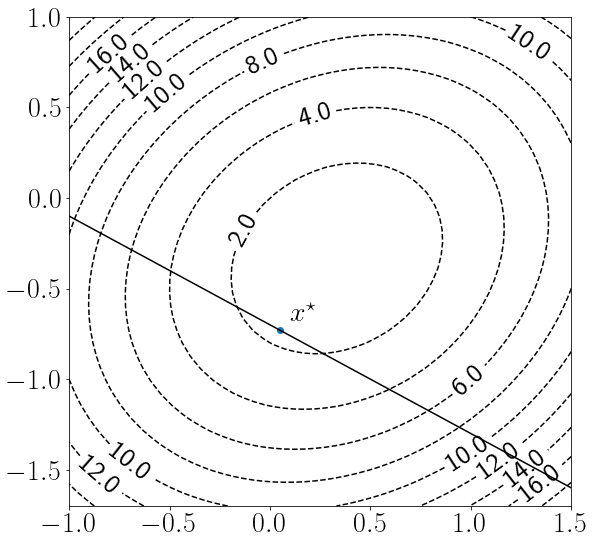

In [49]:
# Make contour plot
fig = plt.figure(figsize=(9, 9))
cs = plt.contour(X1, X2, Y, colors='black', linestyles="dashed", levels=10)
plt.clabel(cs, inline=1, fmt='%1.1f')
plt.scatter(x_star[0], x_star[1])
plt.plot(x1, x2_c, color="k")
plt.text(x_star[0]+0.05, x_star[1] + 0.05, r'$x^\star$')
plt.savefig('small_constrained_least_squares.pdf')